# Кластеризация текстов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Выбираем 4 категории новостей для легковесности примера
categories = [
    'rec.sport.hockey', # хоккей
    'talk.politics.mideast', # политические новости о Ближнем Востоке
    'comp.graphics', # компьютерная графика
    'sci.crypt' # криптография
]

# Скачиваем набор данных
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d документов" % len(dataset.data))
print("%d категории" % len(dataset.target_names))

# Записываем значения категорий для каждой новости
labels = dataset.target

3903 документов
4 категории


In [3]:
dataset

{'data': ['From: c5ff@jupiter.sun.csd.unb.ca (COOK  Charlie)\nSubject: NHL Summary parse results for games played Mon, April 19, 1993\nOrganization: University of New Brunswick\nLines: 79\n\nToronto                          1 1 1--3\nDetroit                          1 4 1--6\nFirst period\n     1, Detroit, Yzerman 1 (Gallant, Ciccarelli) 4:48.\n     2, Toronto, Cullen 1 (Clark, Gill) 10:44.\nSecond period\n     3, Detroit, Sheppard 1 (Probert, Coffey) pp, 5:04.\n     4, Detroit, Burr 1 (Racine) sh, 6:42.\n     5, Detroit, Chiasson 1 (Coffey) pp,11:00.\n     6, Detroit, Howe 1 (Yzerman, Drake) 14:46.\n     7, Toronto, Gilmour 1 (Borschevsky, Ellett) pp, 19:59.\nThird period\n     8, Detroit, Racine 1 (Primeau, Drake) 5:10.\n     9, Toronto, Lefebvre 1 (Cullen, Pearson) 7:45.\n\nDetroit: 6    Power play: 6-2   Special goals:  pp: 2  sh: 1  Total: 3\nScorer            G    A   Pts\n---------------  ---  ---  ---\nBurr               1    0    1\nChiasson           1    0    1\nCiccarelli  

In [4]:
dataset.target

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [5]:
dataset.target_names

['comp.graphics', 'rec.sport.hockey', 'sci.crypt', 'talk.politics.mideast']

## Предобработка данных

In [6]:
# Исходный набор данных, первые 10 примеров
for i in range(10):
    print(dataset.data[i], end='\n' + '*' * 50 + '\n\n')

From: c5ff@jupiter.sun.csd.unb.ca (COOK  Charlie)
Subject: NHL Summary parse results for games played Mon, April 19, 1993
Organization: University of New Brunswick
Lines: 79

Toronto                          1 1 1--3
Detroit                          1 4 1--6
First period
     1, Detroit, Yzerman 1 (Gallant, Ciccarelli) 4:48.
     2, Toronto, Cullen 1 (Clark, Gill) 10:44.
Second period
     3, Detroit, Sheppard 1 (Probert, Coffey) pp, 5:04.
     4, Detroit, Burr 1 (Racine) sh, 6:42.
     5, Detroit, Chiasson 1 (Coffey) pp,11:00.
     6, Detroit, Howe 1 (Yzerman, Drake) 14:46.
     7, Toronto, Gilmour 1 (Borschevsky, Ellett) pp, 19:59.
Third period
     8, Detroit, Racine 1 (Primeau, Drake) 5:10.
     9, Toronto, Lefebvre 1 (Cullen, Pearson) 7:45.

Detroit: 6    Power play: 6-2   Special goals:  pp: 2  sh: 1  Total: 3
Scorer            G    A   Pts
---------------  ---  ---  ---
Burr               1    0    1
Chiasson           1    0    1
Ciccarelli         0    1    1
Coffey           

In [7]:
# Создаём объект, который будет токенизировать данные
analyzer = CountVectorizer(stop_words='english').build_analyzer()

# Токенизируем наш набор данных
docs = []
for document in dataset.data:
    docs.append(analyzer(document.replace('_', '')))

# И посмотрим 10 первых примеров
for i in range(10):
    print(docs[i], end='\n\n')

['c5ff', 'jupiter', 'sun', 'csd', 'unb', 'ca', 'cook', 'charlie', 'subject', 'nhl', 'summary', 'parse', 'results', 'games', 'played', 'mon', 'april', '19', '1993', 'organization', 'university', 'new', 'brunswick', 'lines', '79', 'toronto', 'detroit', 'period', 'detroit', 'yzerman', 'gallant', 'ciccarelli', '48', 'toronto', 'cullen', 'clark', 'gill', '10', '44', 'second', 'period', 'detroit', 'sheppard', 'probert', 'coffey', 'pp', '04', 'detroit', 'burr', 'racine', 'sh', '42', 'detroit', 'chiasson', 'coffey', 'pp', '11', '00', 'detroit', 'howe', 'yzerman', 'drake', '14', '46', 'toronto', 'gilmour', 'borschevsky', 'ellett', 'pp', '19', '59', 'period', 'detroit', 'racine', 'primeau', 'drake', '10', 'toronto', 'lefebvre', 'cullen', 'pearson', '45', 'detroit', 'power', 'play', 'special', 'goals', 'pp', 'sh', 'total', 'scorer', 'pts', 'burr', 'chiasson', 'ciccarelli', 'coffey', 'drake', 'gallant', 'howe', 'primeau', 'probert', 'racine', 'sheppard', 'yzerman', 'toronto', 'power', 'play', 'sco

In [8]:
# Проверим, что число документов осталось прежним
len(docs)

3903

## Векторизация текстов

In [12]:
# #Установка пакета gensim
# !pip install -U gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108253 sha256=e52aaef770819b944d9c5c9b7a6903d338da6a3931aa045b27081613eb1c51a5
  Stored in directory: c:\users\jysanuser\appdata\local\pip\cache\wheels\34\3d\14\f19c01a19c9201cdb6a76b049904d5226912569be919ad1eae
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15


In [13]:
from gensim.models import Word2Vec

# Обучаем модель векторайзера на нашем наборе данных
# На выходе мы получим вектор признаков для каждого слова
model = Word2Vec(docs, min_count=20, size=50)

# Наивный подход к созданию единого эмбеддинга для документа – средний эмбеддинг по словам
def doc_vectorizer(doc, model):
    doc_vector = []
    num_words = 0
    for word in doc:
        try:
            if num_words == 0:
                doc_vector = model[word]
            else:
                doc_vector = np.add(doc_vector, model[word])
            num_words += 1
        except:
            pass
     
    return np.asarray(doc_vector) / num_words

# Составляем эмбеддинги для наших документов
X = []
for doc in docs:
    X.append(doc_vectorizer(doc, model))

C:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [14]:
# Как выглядят первые 10 документов после векторизации 
X[:10]

[array([ 0.05706365,  0.46107548, -0.26459178, -0.4072561 ,  0.07873585,
         1.0797958 ,  0.3002221 , -0.41796765,  0.7296247 ,  0.18106358,
        -0.77095264,  0.05561095, -0.10619929,  0.26624408,  0.75678587,
         0.88237214,  0.10248256,  0.5703706 ,  0.07667595,  0.18111983,
        -0.29384068, -0.6382164 ,  0.05802676,  0.13809043, -1.8885528 ,
         0.22457391,  0.18468277,  0.82963306,  0.34644717, -0.8616869 ,
         0.46644324,  1.1195813 , -0.17053087, -0.28647158,  0.3821353 ,
         0.60631096,  0.57499266, -0.750718  ,  0.72499186, -0.0627642 ,
         0.3439049 , -0.5295663 , -0.71882313, -0.00592987, -0.33677796,
        -0.93416065, -0.01256682,  0.38294128, -0.11642173,  0.26500157],
       dtype=float32),
 array([ 0.17027669,  0.09985943,  0.13162464,  0.07361333,  0.39491573,
         0.25129128,  0.02353159, -0.05089846,  0.28016317,  0.05128228,
        -0.15027964, -0.27270076, -0.04594858,  0.36156917,  0.5917109 ,
         0.43786308,  0.292

In [15]:
# Проверим размер вектора для документа
print(np.asarray(X).shape)

(3903, 50)


In [16]:
# t-SNE – метод понижения размерности
from sklearn.manifold import TSNE

# Создаём объект для выполнения t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Преобразуем наши данные, понизив размерность с 50 до 2
X = tsne.fit_transform(X)

print(np.asarray(X).shape)

(3903, 2)


## Кластеризация

In [17]:
# Создаём KMeans кластеризатор 
kmeans = KMeans(n_clusters=4)

# Обучим кластеризатор на подготовленных данных
kmeans.fit(X)

KMeans(n_clusters=4)

In [18]:
# Получаем предсказанные кластеры
y_pred = kmeans.labels_.astype(np.int)

# Координаты полученных центроидов
print ("Координаты центроидов:\n", kmeans.cluster_centers_)

Координаты центроидов:
 [[ -6.1211214  -36.96718   ]
 [ 53.205322     1.8163451 ]
 [ -7.7145033   46.357357  ]
 [-38.6569      -0.38413256]]


In [19]:
# Метрики
print ("Коэффициент силуэта: %0.3f" % metrics.silhouette_score(X, y_pred, metric='euclidean'))
print("Однородность: %0.3f" % metrics.homogeneity_score(labels, y_pred))
print("Полнота: %0.3f" % metrics.completeness_score(labels, y_pred))
print("V-мера: %0.3f" % metrics.v_measure_score(labels, y_pred))

Коэффициент силуэта: 0.506
Однородность: 0.750
Полнота: 0.752
V-мера: 0.751


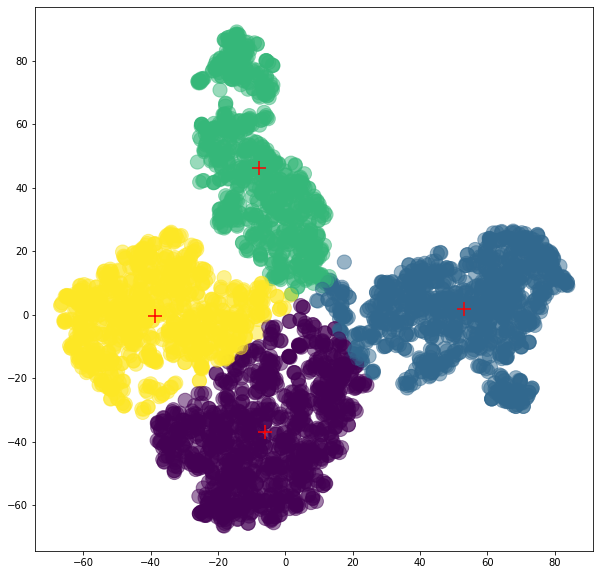

In [20]:
# Графики полученных кластеров
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=200, alpha=.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='+')
plt.show()

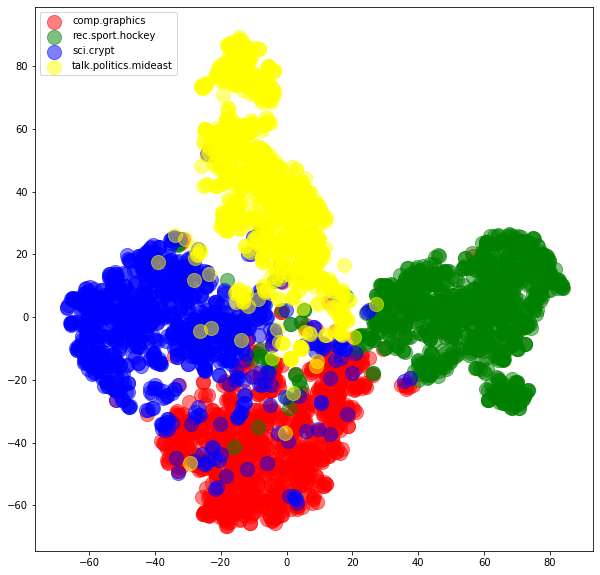

In [21]:
# Построим график истинных классов
colors = ("red", "green", "blue", "yellow")

for i in range(4):
    plt.scatter(X[labels==i][:, 0], X[labels==i][:, 1], \
                s=200, alpha=.5, c=colors[i], label=dataset.target_names[i])
    plt.legend(loc=2)

plt.show()